In [1]:
import psycopg2
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df1 = pd.read_csv('df1.csv')
df1

,abone_durumu,age,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_white-collar,marital_married,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,0,58,0,2143,1,0,5,5,261,1,...,0,1,1,0,1,0,0,1,0,0
1,0,44,0,29,1,0,5,5,151,1,...,0,0,0,1,0,0,0,1,0,0
2,0,33,0,2,1,1,5,5,76,1,...,0,1,1,1,0,0,0,1,0,0
3,0,47,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,1,0,0
4,0,35,0,231,1,0,5,5,139,1,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44918,1,51,0,825,0,0,17,11,977,3,...,0,0,1,0,1,0,0,0,0,0
44919,1,71,0,1729,0,0,17,11,456,2,...,0,0,0,0,0,0,0,0,0,0
44920,1,72,0,5715,0,0,17,11,1127,5,...,0,0,1,1,0,0,0,0,0,1
44921,0,57,0,668,0,0,17,11,508,4,...,0,0,1,1,0,0,1,0,0,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44923 entries, 0 to 44922
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   abone_durumu         44923 non-null  int64
 1   age                  44923 non-null  int64
 2   default              44923 non-null  int64
 3   balance              44923 non-null  int64
 4   housing              44923 non-null  int64
 5   loan                 44923 non-null  int64
 6   day                  44923 non-null  int64
 7   month                44923 non-null  int64
 8   duration             44923 non-null  int64
 9   campaign             44923 non-null  int64
 10  pdays                44923 non-null  int64
 11  previous             44923 non-null  int64
 12  job_other            44923 non-null  int64
 13  job_unemployed       44923 non-null  int64
 14  job_white-collar     44923 non-null  int64
 15  marital_married      44923 non-null  int64
 16  education_secondary  4

In [4]:
## MODELİN EĞİTİMİ 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop('abone_durumu', axis=1), df1['abone_durumu'], 
                                                    test_size=0.2, random_state=42, stratify=df1['abone_durumu'])

In [6]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
importances_rf = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(rf_model.feature_importances_,3)})
importances_rf = importances_rf.sort_values('Importance', ascending=False).set_index('Feature')
importances_rf

,Importance
Feature,
duration,0.290
balance,0.114
age,0.106
day,0.097
month,0.082
poutcome_success,0.059
pdays,0.049
campaign,0.042
previous,0.026


In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
importances_dt = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(dt_model.feature_importances_,3)})
importances_dt = importances_dt.sort_values('Importance', ascending=False).set_index('Feature')
importances_dt

,Importance
Feature,
duration,0.286
balance,0.120
age,0.098
day,0.096
poutcome_success,0.090
month,0.089
pdays,0.050
campaign,0.039
housing,0.026


In [10]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.90442404, 0.90289371, 0.90651085, 0.90621956, 0.9035759 ])

In [11]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')
acc_dt


array([0.87632165, 0.87089594, 0.87687813, 0.87644358, 0.87574788])

In [12]:
xgboost = XGBClassifier()

acc_xgboost = cross_val_score(xgboost, x_train, y_train, cv=5, scoring='accuracy')
acc_xgboost

array([0.90609349, 0.90637173, 0.90706733, 0.90594128, 0.90246278])

In [13]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

x_train_scaled = std_scale.fit_transform(x_train)
x_test_scaled = std_scale.transform(x_test)

In [14]:
logreg = LogisticRegression(solver='liblinear')

acc_logreg = cross_val_score(logreg, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_logreg


array([0.9001113 , 0.89482471, 0.90191987, 0.90134966, 0.90107138])

In [15]:
knn = KNeighborsClassifier()

acc_knn = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_knn

array([0.89315526, 0.89190317, 0.89385086, 0.89675804, 0.89188813])

In [16]:
perceptron = Perceptron()

acc_perc = cross_val_score(perceptron, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_perc

array([0.85698386, 0.83945465, 0.82526433, 0.83748435, 0.84555447])

In [17]:
svc = SVC()

acc_svc = cross_val_score(svc, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_svc

array([0.89816361, 0.89468559, 0.89830273, 0.89954084, 0.9000974 ])

In [18]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,90.56,0.16
Random Forest,90.47,0.14
Logistic Regression,89.99,0.26
SVC,89.82,0.19
KNN,89.35,0.18
Decision Tree,87.53,0.22
Perceptron,84.09,1.04


In [19]:
#yüksek hassasiyetle (precision) birlikte düşük bir duyarlılık (recall), azınlık sınıfındaki örneklerin doğru şekilde tanınmadığını 
#ve modelin azınlık sınıfını yanlış tahmin etme eğiliminde olduğunu gösteriyor.
#oversampling yaparak bir model oluşturup ardından dengeli olmayan bir modelle karşılaştıracağız. 

# RandomForestClassifier modelini tanımlayın
rf = RandomForestClassifier()

# Modelin tahminlerini cross-validation kullanarak elde edin
y_pred = cross_val_predict(rf, x_train, y_train, cv=5)

# Accuracy, Precision, Recall ve F1 skorlarını hesaplayın
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9046691524291836
Precision: 0.6543650793650794
Recall: 0.3922454804947669
F1 Score: 0.4904818560380726


In [20]:
#En iyi sonucu Random Forest döndürüyor gibi standart sapması en düşük. Test veri setinde bu işlemi gözlemledik. 
rf = RandomForestClassifier()

rf.fit( x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9052865887590429

In [21]:
## MODELİN DENGESİZLİĞİ ANLAŞILDI metrikler ve confusian matrix değerleri incelenerek teyit edildi. 

In [22]:
def evaluate_model(model, X, y, pred_label=1):

    """
    This function evaluates your model and interprets the classification metrics results in a DataFrame format.
    
    Input
    ---------
    model: Classification Model
    X: Features
    y: Label
    pred_label: Which label will be used for interprets the results
        
    Output
    -------
    metric_df: Result DataFrame
    """
    
    y_pred = model.predict(X)

    accuracy = round(accuracy_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred, pos_label = pred_label), 3)
    precision = round(precision_score(y, y_pred, pos_label = pred_label), 3)
    f1 = round(f1_score(y, y_pred, pos_label = pred_label), 3)
    auc_score = round(roc_auc_score(y, y_pred), 3)

    metric_df = pd.DataFrame([accuracy, recall, precision, f1, auc_score]).T
    metric_df.index = ["Class " + str(pred_label)]
    metric_df.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

    return metric_df

In [23]:
evaluate_model(rf, x_test_scaled, y_test, pred_label=0)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 0,0.905,0.972,0.924,0.948,0.686


In [24]:
#Henüz dengelenmemiş veri setinde amacımız 1 (abone olma) durumunu tahmin etmek ve 1 sınıfında RECALL %40'larda düşük. 
#Bir de AUC Score değerinin 1'e yakın olması önemli şu an düşük derecede. Accuracy bu veri setinde gerçek başarı değil. 
evaluate_model(rf, x_test_scaled, y_test, pred_label=1)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 1,0.905,0.401,0.656,0.497,0.686


In [25]:
#Yetimedik bir de confusion matrix değerlerini de inceleyecğiz. 

def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [57]:
#Veri setimizi kopyaladık ve ismini değiştirdik.
imbalanced_df=df1.copy()
imbalanced_df

,abone_durumu,age,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_white-collar,marital_married,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,0,58,0,2143,1,0,5,5,261,1,...,0,1,1,0,1,0,0,1,0,0
1,0,44,0,29,1,0,5,5,151,1,...,0,0,0,1,0,0,0,1,0,0
2,0,33,0,2,1,1,5,5,76,1,...,0,1,1,1,0,0,0,1,0,0
3,0,47,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,1,0,0
4,0,35,0,231,1,0,5,5,139,1,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44918,1,51,0,825,0,0,17,11,977,3,...,0,0,1,0,1,0,0,0,0,0
44919,1,71,0,1729,0,0,17,11,456,2,...,0,0,0,0,0,0,0,0,0,0
44920,1,72,0,5715,0,0,17,11,1127,5,...,0,0,1,1,0,0,0,0,0,1
44921,0,57,0,668,0,0,17,11,508,4,...,0,0,1,1,0,0,1,0,0,0


In [27]:
#tekrar dengesine baktık fazladan işlemler
target_count = imbalanced_df.abone_durumu.value_counts(normalize=True)
target_count

abone_durumu
0    0.883022
1    0.116978
Name: proportion, dtype: float64

In [28]:
#veri setimizin yüzdelik dağılımına tekrar baktık. 
imbalanced_df.abone_durumu.value_counts()

abone_durumu
0    39668
1     5255
Name: count, dtype: int64

In [29]:
# stratify=y parametresi veri setini bölme aşamasında train ve testteki label dağılımının dengeli olacağını söyler
X = imbalanced_df.iloc[:, 1:]
y = imbalanced_df.abone_durumu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
#RF ile tekrar eğittik. 
rf = RandomForestClassifier()

rf.fit( X_train, y_train)

RandomForestClassifier()

In [31]:
#bu henüz dengesizlik giderilmemiş durum.
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 3)}')

Model Accuracy: 0.904


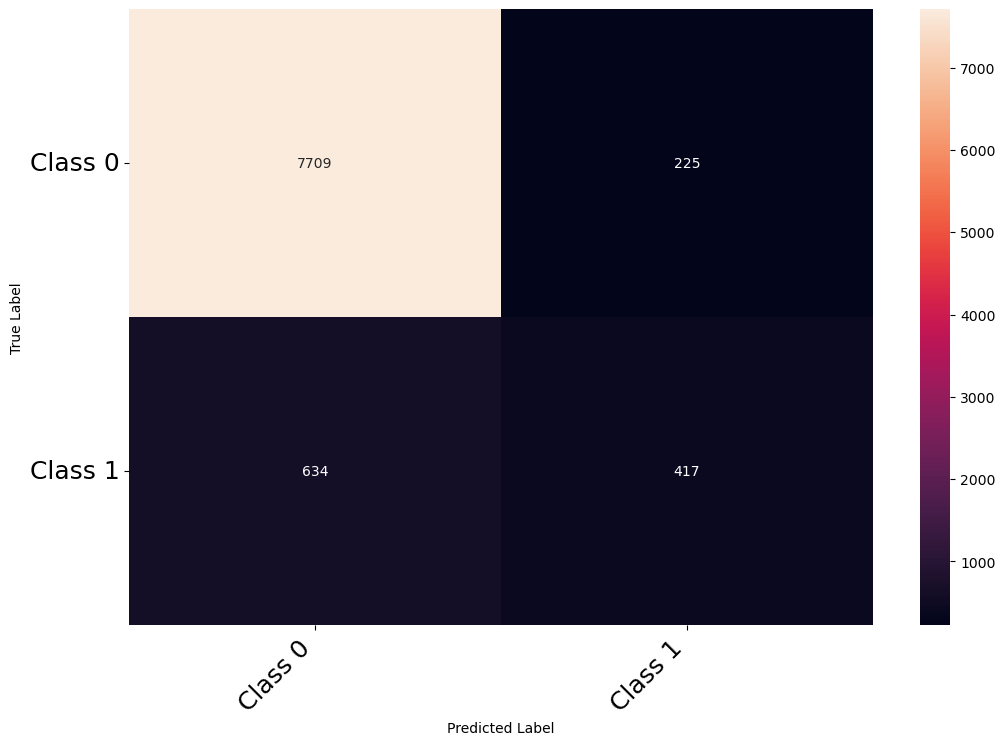

In [32]:
#Gerçekte O sınıfının 7718 tanesini doğru tahmin 216 adedini yanlış tahmin etmiş. 
#Gerçekte 1 sınıfının  629 tanesini yanlış tahmin etmiş, 422 adedini doğru tahmin etmiş. 
#Dengesizliğin modelimizin başarısını etkilediğini görebiliyoruz o yüzden düzeltme işlemlerine geçeceğiz. 
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [33]:
def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Legit', 'Fraud'],
           yticklabels=['Legit', 'Fraud']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [34]:
# Threshold değerini değiştirdiğimizde sonucun da interaktif bir şekilde değişmesi için bir widget
#%23'e düşürmek bize anlamlı bir sonuç döndürüyor recall yükseliyor ama precision düşüyor mantıklı değil 
from ipywidgets import interactive

interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


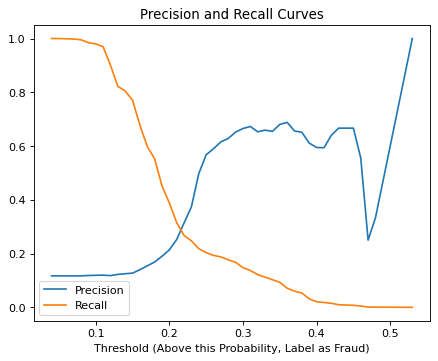

In [35]:
#precision ve recall'ün keşiştiği ve en doğru threshold değeri %23 gibi görünüyor. 
from sklearn.metrics import precision_recall_curve
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(x_test_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Above this Probability, Label as Fraud)');
plt.title('Precision and Recall Curves');

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC AUC Score= 0.622


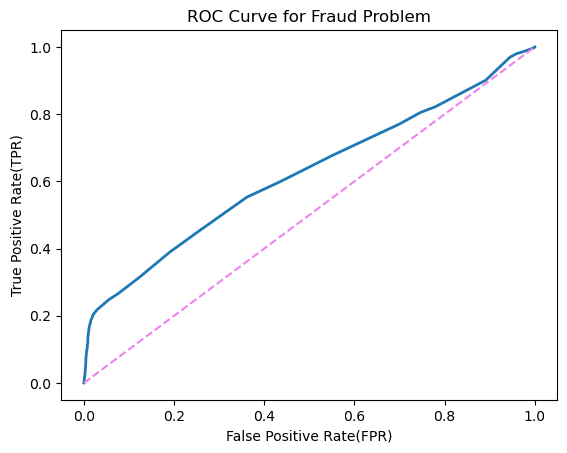

In [36]:
#Dengesiz veri kümesinde en öenmli parametre AUC - ROC
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve for Fraud Problem');
print("ROC AUC Score=", round(roc_auc_score(y_test, rf.predict_proba(x_test_scaled)[:,1]),3))

In [48]:
# stratify=y parametresi veri setini bölme aşamasında train ve testteki label dağılımının dengeli olacağını söyler
X = imbalanced_df.iloc[:, 1:]
y = imbalanced_df.abone_durumu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
#RF ile tekrar eğittik. Modeli Oluşturduk.
lm1 = RandomForestClassifier()

lm1.fit( X_train[['duration']].values, y_train)

RandomForestClassifier()

In [50]:
print("Training Accuracy:", round(lm1.score(X_train[['duration']].values, y_train), 3))
print("Testing Accuracy:", round(lm1.score(X_test[['duration']].values, y_test), 3))

Training Accuracy: 0.9
Testing Accuracy: 0.883


In [70]:
lm1.predict([[76],[456],[508],[977],[1127]])

array([0, 0, 0, 0, 1], dtype=int64)

In [71]:
lm1.predict_proba([[76],[456],[508],[977],[1127]])

array([[0.99172363, 0.00827637],
       [0.80192665, 0.19807335],
       [0.83228987, 0.16771013],
       [0.54652381, 0.45347619],
       [0.0125    , 0.9875    ]])

In [40]:
feature = X_train[['duration']].values # Eğitimde kullandığım özellikler
prediction_train = lm1.predict(feature) # Bu özellikleri input olarak kullanarak tahmin gerçekleştirme

In [41]:
prediction_test = lm1.predict(X_test[['duration']].values)

In [42]:
confusion_matrix(y_train, prediction_train) # Eğitim veri setimize ait hata matrisi

array([[31383,   351],
       [ 3228,   976]], dtype=int64)

In [43]:
confusion_matrix(y_test, prediction_test) # Test veri setimize ait hata matrisi

array([[7772,  162],
       [ 888,  163]], dtype=int64)

In [44]:
std_scale = StandardScaler()

X_train = X_train[['duration', 'balance' ]]
X_train_scaled = std_scale.fit_transform(X_train) # Eğitim veri seti için fit_transform

X_test = X_test[['duration', 'balance']]
X_test_scaled = std_scale.transform(X_test) # Test veri seti için transform

lm2 = RandomForestClassifier()
lm2.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(lm2.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lm2.score(X_test_scaled, y_test),3))

Training Accuracy: 0.995
Testing Accuracy: 0.87


In [45]:
duration = 977
balance = 825

example_df = pd.DataFrame({
    'duration': [duration],
    'balance': [balance]
})
example_df

,duration,balance
0,977,825


In [46]:
lm2.predict(example_df)

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [47]:
#Tahmin değerinde %39 0 sınıfına aittir, %61 1 sınıfına aittir
lm2.predict_proba(example_df)

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0.43, 0.57]])